<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Load-Data" data-toc-modified-id="Load Data">Load Data</a></span></li>
    <li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory Data Analysis">Exploratory Data Analysis</a></span></li>
    <li><span><a href="#Pipeline-and-Feature-Engineering" data-toc-modified-id="Pipeline and Feature Engineering">Pipeline and Feature Engineering</a></span></li>
    <li><span><a href="#Evaluation-Metrics" data-toc-modified-id="Evaluation Metrics">Evaluation Metrics</a></span></li>
    <li><span><a href="#Hypterparameter-Tuning" data-toc-modified-id="Hypterparameter Tuning">Hypterparameter Tuning</a></span></li>
    <li><span><a href="#Predict-Test-Value" data-toc-modified-id="Predict Test Value">Predict Test Value</a></span></li>
    </ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import compose

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data
--------

In [2]:
data = pd.read_csv("../Data/train.csv")

from sklearn.model_selection import train_test_split
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
log_y_train = np.log(y_train+1)

Exploratory Data Analysis
------

In [4]:
X_train.get_dtype_counts()

int64      34
object     43
float64     3
dtype: int64

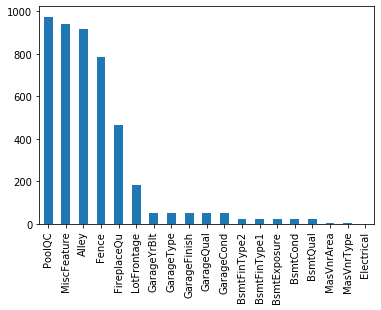

In [5]:
Num_Nulls = X_train.isnull().sum()
Num_Nulls = Num_Nulls[Num_Nulls > 0]
Num_Nulls.sort_values(ascending=False,inplace=True)
Num_Nulls.plot.bar()

/Users/xuliu/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


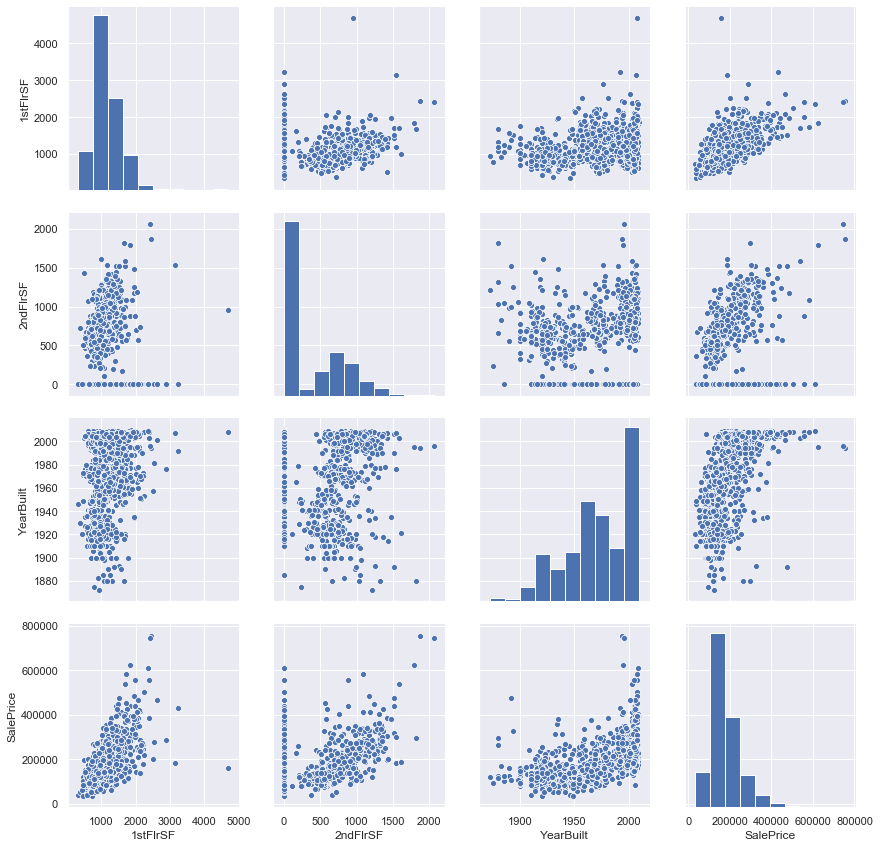

In [6]:
#scatterplot
sns.set()
cols = ['1stFlrSF','2ndFlrSF','YearBuilt', 'SalePrice']
sns.pairplot(data[cols], size = 3)
plt.show();

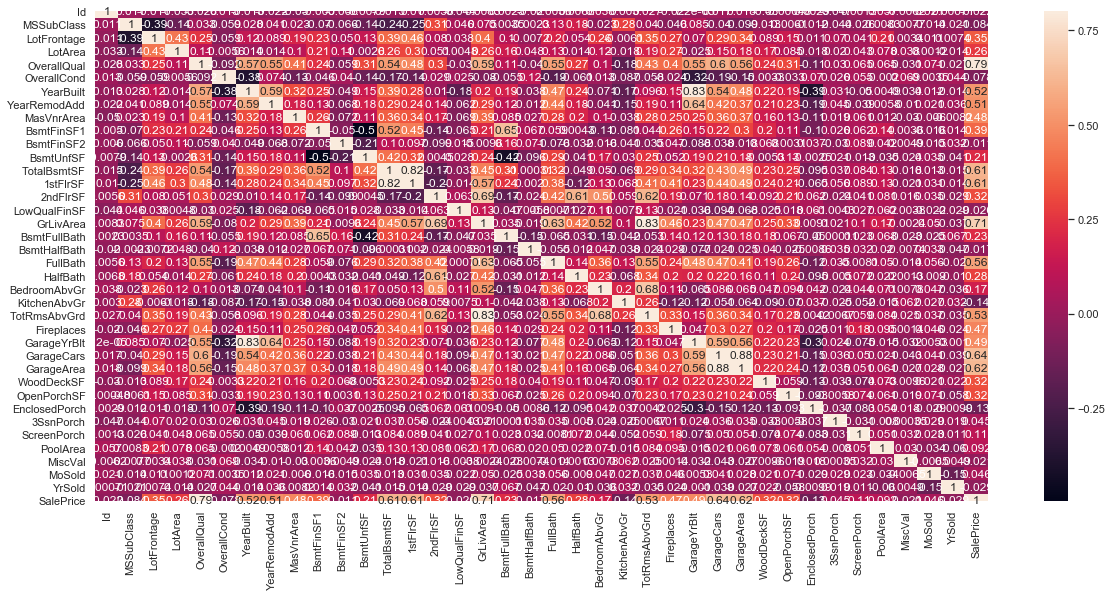

In [7]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24851810>,
      dtype=object)

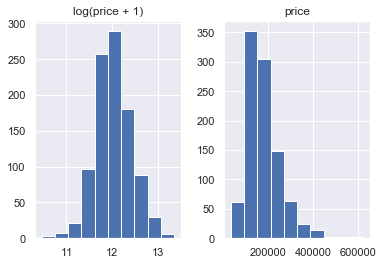

In [8]:
prices = pd.DataFrame({"price":y_train, "log(price + 1)":np.log1p(y_train)})
prices.hist()

In [9]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=36,whiten=True)
# pca = pca.fit(all_data)
# dataPCA = pca.transform(all_data)

In [10]:
# predictor_cols=['GrLivArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd','LotFrontage']
# SelectData=all_data[predictor_cols]

Pipeline and Feature Engineering
----

In [11]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import compose
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Reduced Model
def make_pipelines(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFullBath','BsmtHalfBath','BsmtUnfSF',
                       'EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea','HalfBath',
                       'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','MoSold','MSSubClass','OpenPorchSF',
                       'OverallCond','OverallQual','PoolArea','ScreenPorch','YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 
                        'TotRmsAbvGrd', 'TotalBsmtSF']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                           'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                           'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                           'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                           'SaleType','Street','Utilities']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [13]:
# Naive Selection
def make_pipelines2(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['1stFlrSF','2ndFlrSF','YrSold',  'YearBuilt']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['HouseStyle','Neighborhood','Street']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [14]:
# Full Selection
def make_pipelines3(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', '1stFlrSF', 
                        'YearBuilt', '2ndFlrSF', 'YearRemodAdd', 'LotArea', 'GarageYrBlt', 'LotFrontage', 
                        'OverallCond', 'GarageArea', 'OpenPorchSF', 'Fireplaces', 'FullBath', 'BsmtUnfSF',
                        'YrSold', 'BsmtFullBath', 'MSSubClass', 'WoodDeckSF', 'KitchenAbvGr', 'HalfBath', 
                        '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'MasVnrArea', 'MiscVal']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                           'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                           'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                           'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                           'SaleType','Street','Utilities']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [15]:
pipelines= make_pipelines()
pipelines2 = make_pipelines2()
pipelines3 = make_pipelines3()

Evaluation Metrics
-----

In [16]:
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [17]:
def MAPE(predict,target):
    return (abs((target - predict) / target).mean()) * 100

In [18]:
def scores(pipelines, X_train, X_test, y_train, y_test):
    d_test = dict()
    d_train = dict()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        y_pred_train = pipe.predict(X_train)
        mae_train = round(median_absolute_error(y_train, y_pred_train), 2)
        mse_train = round(mean_squared_error(y_train, y_pred_train), 2)
        r2_train = round(r2_score(y_train, y_pred_train), 2)
        mape_train = MAPE(y_train, y_pred_train)
        rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
        
        #pipe.fit(X_test, y_test)
        y_pred = pipe.predict(X_test)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        mae = round(median_absolute_error(y_test, y_pred), 2)
        mse = round(mean_squared_error(y_test, y_pred), 2)
        r2 = round(r2_score(y_test, y_pred), 2)
        mape = MAPE(y_test, y_pred)
        rmse = sqrt(mean_squared_error(y_test, y_pred))

        
        d_test[name] = [mae, mse, r2, mape, rmse]
        d_train[name] = [mae_train, mse_train, r2_train, mape_train, rmse_train]
    return d_test, d_train 

In [19]:
d_test, d_train = scores(pipelines, X_train, X_test, np.log(y_train+1), np.log(y_test+1))
df_test = pd.DataFrame(d_test.values(), d_test.keys())
df_train = pd.DataFrame(d_train.values(), d_train.keys())
df_test.columns = ['MAE_test', 'MSE_test', 'R^2_test', 'MAPE_test', 'rmsle_test']
df_train.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle_train']

In [20]:
df_train

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle_train
RandomForestRegressor,0.05,0.02,0.90,0.678178,0.124231
Lasso,0.08,0.03,0.78,0.988525,0.181953
GradientBoostingRegressor,0.04,0.01,0.97,0.452154,0.072127


In [21]:
df_test

,MAE_test,MSE_test,R^2_test,MAPE_test,rmsle_test
RandomForestRegressor,0.07,0.02,0.86,0.869544,0.155604
Lasso,0.08,0.03,0.81,1.001921,0.179815
GradientBoostingRegressor,0.06,0.02,0.89,0.754498,0.137149


In [22]:
d_test2, d_train2 = scores(pipelines2, X_train, X_test, np.log(y_train+1), np.log(y_test+1))
df_test2 = pd.DataFrame(d_test2.values(), d_test2.keys())
df_train2 = pd.DataFrame(d_train2.values(), d_train2.keys())
df_test2.columns = ['MAE', 'MSE', 'R^2', 'MAPE', 'rmsle']
df_train2.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle']

In [23]:
df_train2

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.08,0.03,0.82,0.974492,0.167399
Lasso,0.10,0.05,0.69,1.201186,0.216937
GradientBoostingRegressor,0.08,0.02,0.89,0.817709,0.132410


In [24]:
df_test2

,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.09,0.04,0.79,1.084460,0.189584
Lasso,0.10,0.04,0.77,1.157128,0.197627
GradientBoostingRegressor,0.09,0.03,0.82,1.043915,0.176425


In [25]:
d_test3, d_train3 = scores(pipelines3, X_train, X_test, np.log(y_train+1), np.log(y_test+1))
df_test3 = pd.DataFrame(d_test3.values(), d_test3.keys())
df_train3 = pd.DataFrame(d_train3.values(), d_train3.keys())
df_test3.columns = ['MAE', 'MSE', 'R^2', 'MAPE', 'rmsle']
df_train3.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle']

In [26]:
df_train3

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.05,0.02,0.90,0.679540,0.124452
Lasso,0.09,0.04,0.77,1.010115,0.187805
GradientBoostingRegressor,0.04,0.01,0.96,0.458621,0.074082


In [27]:
df_test3

,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.07,0.02,0.86,0.868982,0.155697
Lasso,0.07,0.03,0.82,0.993663,0.176429
GradientBoostingRegressor,0.06,0.02,0.89,0.760381,0.139320


Even though GBR performs slightly better then RF, it overfits a lot more.

Hypterparameter Tuning
-----

In [28]:
def impute(df, feature, imputer="mean"):
    if imputer=="mean":
        df[feature] = df[feature].fillna(df[feature].mean())
    elif imputer=="median":
        df[feature] = df[feature].fillna(df[feature].median())
    elif imputer==0:
        df[feature] = df[feature].fillna(0)
    elif imputer=="category":
        df[feature] = df[feature].fillna("missing")
    elif imputer=="mode":
        df[feature] = df[feature].fillna(df[feature].mode())
    return df

We manually impute the data again and then train the hypterparameter

In [29]:
numeric_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFullBath','BsmtHalfBath','BsmtUnfSF',
                   'EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea','HalfBath',
                   'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','MoSold','MSSubClass','OpenPorchSF',
                   'OverallCond','OverallQual','PoolArea','ScreenPorch','YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 
                    'TotRmsAbvGrd', 'TotalBsmtSF']
    
categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                   'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                   'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                   'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                   'SaleType','Street','Utilities']

In [30]:
# data = pd.read_csv("../Data/train.csv")

# from sklearn.model_selection import train_test_split
# y = data.SalePrice
# X = data.drop(['SalePrice'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [31]:
X_numeric = X[numeric_features]

In [32]:
X_cat = X[categorical_features]

In [33]:
num = impute(X_numeric,numeric_features,imputer="median")

/Users/xuliu/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
cat = pd.get_dummies(impute(X_cat,categorical_features,imputer="mode"))

In [35]:
X_after_fill_missing = pd.concat([num, cat], axis=1)

Since we could have problem for categorical features with one hot encoding,
so we decide to fill the missing values first and then split the train and test data

In [36]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_after_fill_missing, y, test_size=0.33, random_state=42)

In [37]:
X_after_fill_missing  # This is the training data after imputing the missing value

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706,1,0,150,0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978,0,1,284,0,1,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486,1,0,434,0,1,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216,1,0,540,272,1,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655,1,0,490,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,953,0,1,...,0,0,0,0,0,1,0,1,1,0
1456,2073,0,0,3,790,1,0,589,0,2,...,0,0,0,0,0,1,0,1,1,0
1457,1188,1152,0,4,275,0,0,877,0,2,...,0,0,0,0,0,1,0,1,1,0
1458,1078,0,0,2,49,1,0,0,112,0,...,0,0,0,0,0,1,0,1,1,0


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Limit the number of folds and samples

cv=5
n_iter=20

In [39]:
def make_random_cv():
    """
    Steps:
    1. Define Estimator
    2. Define hyperparameter search space
    3. Instantiate RandomizedSearchCV
    """
    n_estimators = np.arange(10, 30)
    max_depth = [4, None]
    max_features = np.arange(1, 40)
    min_samples_split = np.arange(2, 20)
    bootstrap = [True, False]
    hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split,
                          bootstrap=bootstrap)
    clf_random_cv = RandomizedSearchCV(RandomForestRegressor(random_state=42), hyperparameters, cv=cv, n_iter=n_iter)
    
    return clf_random_cv

In [40]:
clf_random_cv = make_random_cv()

In [41]:
clf_random_cv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                       

In [42]:
clf_random_cv.fit(X_train_m, y_train_m)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [43]:
clf_random_cv.best_params_

{'n_estimators': 26,
 'min_samples_split': 10,
 'max_features': 38,
 'max_depth': None,
 'bootstrap': False}

In [44]:
rf_random_search = RandomForestRegressor(n_estimators=17, min_samples_split=10, max_features=39, # the final model
                                         max_depth=None, bootstrap=False)

In [45]:
rf_random_search.fit(X_train_m, y_train_m)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=39, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=17,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Predict Test Value
------

In [46]:
y_pred_m = rf_random_search.predict(X_test_m)

In [47]:
medae_value_train = median_absolute_error(np.log(y_test_m+1), np.log(y_pred_m+1))
print(f"{medae_value_train:.4f} medae on train dataset")  

0.0688 medae on train dataset


In [48]:
sqrt(mean_squared_error(np.log(y_test_m+1), np.log(y_pred_m+1)))

0.14897484828436583

After training the hyperparameters, the rsmle on test set decreased from 0.1557 to 0.1492